# Expression Matrix Preprocessing

steps includes:
1. removing low expression genes based on TPM
2. selecting focal tissue/organ samples
3. removing housekeeping genes based on Coefficient of variation (CV)

In [1]:
tpm_cutoff = 5
tissue = "leaf"
cv_cutoff = 30

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

goi_list = [
    "PtXaTreH.14G131700",
    "PtXaTreH.10G125100",
    "PtXaTreH.06G010600",
    "PtXaTreH.05G120200",
    "PtXaTreH.03G064200",
    "PtXaTreH.02G086600",
]
expression_matrix = pd.read_csv("data/merged_tpm_short_name.csv", index_col=0)


## removing low expression genes based on TPM

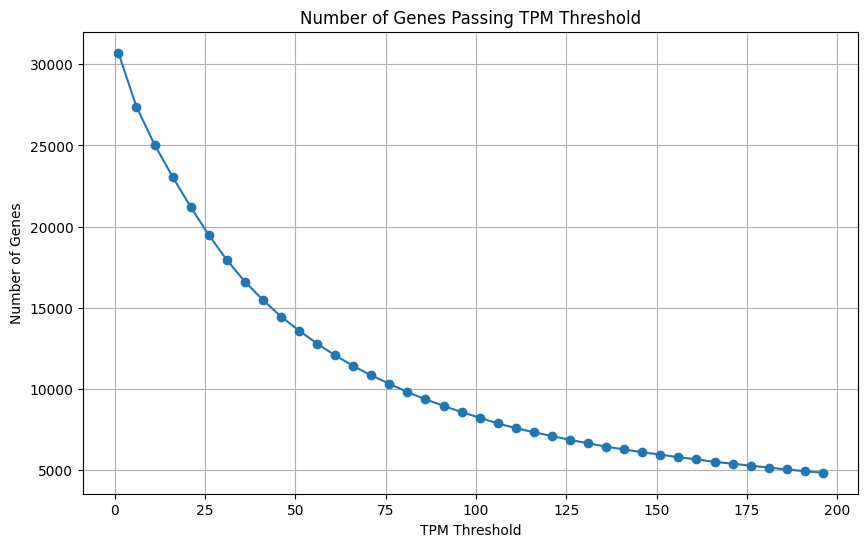

In [5]:
# Initialize lists to store thresholds and corresponding gene counts
thresholds = []
gene_counts = []

# Iterate over different TPM thresholds from 1 to 200 with step 5
for threshold in range(1, 201, 5):
    # Check if any sample has TPM greater than the current threshold for each gene
    has_greater_than_threshold = (expression_matrix > threshold).any(axis=1)
    
    # Count the number of genes that pass the threshold
    num_passed_threshold = has_greater_than_threshold.sum()
    
    # Append the threshold and corresponding gene count to lists
    thresholds.append(threshold)
    gene_counts.append(num_passed_threshold)
    # print(threshold, expression_matrix[has_greater_than_threshold].index.isin(lsg_list).sum())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, gene_counts, marker='o', linestyle='-')
plt.title('Number of Genes Passing TPM Threshold')
plt.xlabel('TPM Threshold')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()


In [6]:
# Check if any sample has TPM greater than cutoff for each gene

has_greater_than_cutoff = (expression_matrix > tpm_cutoff).any(axis=1)

# Filter out genes where no sample has TPM greater than the cutoff
tpm_filtered_expression_matrix = expression_matrix.loc[has_greater_than_cutoff]
print(tpm_filtered_expression_matrix.shape)

(27939, 327)


## selecting focal tissue/organ samples

In [7]:
filtered_expression_matrix = tpm_filtered_expression_matrix.loc[:,(tpm_filtered_expression_matrix.columns.str.contains(tissue))]

filtered_expression_matrix

,1_leaf (young)_control_380CO2__rep1_tpm,1_leaf (young)_control_380CO2__rep3_tpm,1_leaf (young)_control_380CO2__rep2_tpm,1_leaf (young)_control_380CO2_recovered_rep2_tpm,1_leaf (young)_control_380CO2_recovered_rep1_tpm,1_leaf (young)_control_500CO2__rep2_tpm,1_leaf (young)_control_500CO2__rep3_tpm,1_leaf (young)_control_500CO2__rep1_tpm,1_leaf (young)_control_500CO2_recovered_rep2_tpm,1_leaf (young)_control_500CO2_recovered_rep1_tpm,...,5_leaf_control__rep10_tpm,5_leaf_co-cultivated (Laccaria bicolor)__rep2_tpm,8_leaf_control__rep12_tpm,15_leaf primordia___rep2_tpm,15_leaf primordia___rep1_tpm,8_leaf_control__rep11_tpm,8_leaf_control__rep13_tpm,8_leaf_50% defoliation__rep3_tpm,8_leaf_50% defoliation__rep1_tpm,8_leaf_50% defoliation__rep2_tpm
target_id,,,,,,,,,,,,,,,,,,,,,
PtXaTreH.T003800,1.9,1.7,0.9,0.7,0.0,1.4,0.8,0.9,3.9,1.1,...,0.2,0.5,1.6,6.5,7.2,3.5,0.0,0.0,1.8,2.1
PtXaTreH.T003900,22.1,33.2,28.3,27.0,16.9,34.4,26.0,38.3,22.0,55.7,...,5.8,13.7,62.1,9.9,9.2,55.9,134.1,109.8,123.0,162.3
PtXaTreH.T004100,2.3,3.8,5.0,1.5,0.7,5.4,4.7,1.8,7.3,3.7,...,4.1,11.7,5.3,42.1,39.4,4.3,4.2,1.7,6.0,7.4
PtXaTreH.T004200,22.1,33.2,28.3,27.0,16.9,34.4,26.0,38.3,22.0,55.7,...,5.8,13.7,62.1,9.9,9.2,55.9,134.1,109.8,123.0,162.3
PtXaTreH.T004300,47.2,71.8,41.9,19.9,14.9,31.1,40.3,38.6,32.9,84.2,...,77.2,261.9,10.4,3128.5,3150.6,11.3,16.4,32.9,22.2,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PtXaTreH.02G216700,18.6,18.1,19.2,14.9,13.9,17.3,21.5,18.6,26.3,25.0,...,15.6,13.6,28.9,64.2,62.8,20.2,35.1,14.7,20.3,19.7
PtXaTreH.02G216800,16.2,11.4,11.5,14.3,15.4,12.2,14.4,12.8,15.1,11.9,...,14.7,13.3,4.7,13.5,14.1,10.5,8.6,5.9,7.7,6.4
PtXaTreH.02G216900,32.4,27.3,30.4,34.8,27.8,27.0,32.2,24.8,34.7,36.3,...,23.3,20.9,12.5,35.9,36.2,16.5,20.7,16.9,10.8,14.1


## removing housekeeping genes based on Coefficient of variation (CV)

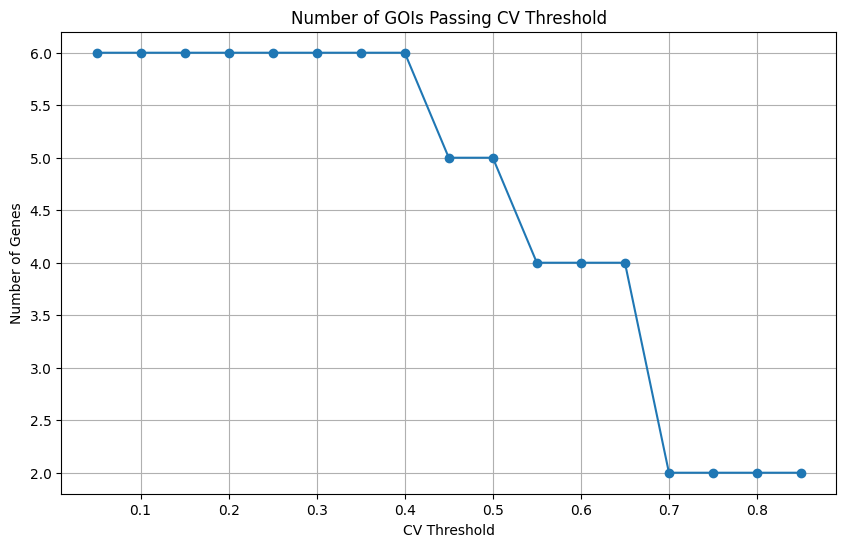

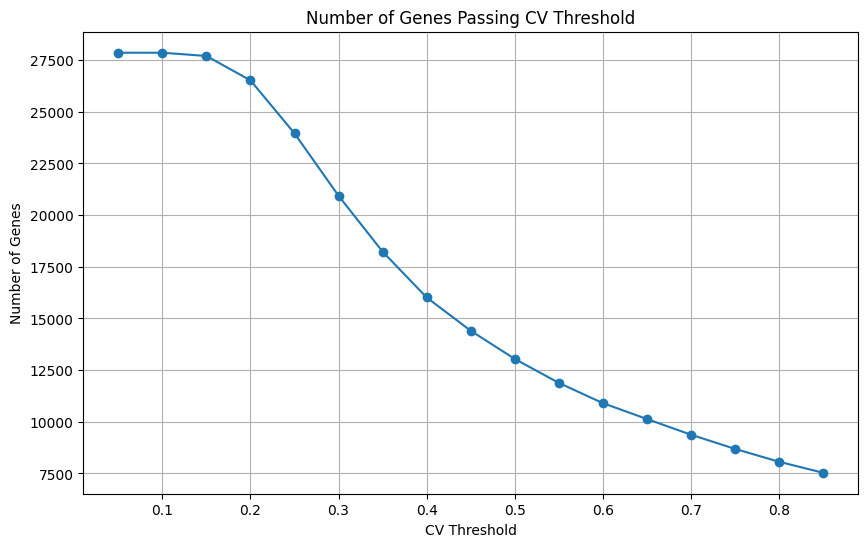

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data for testing
# filtered_expression_matrix = pd.read_csv("filtered_expression_matrix.csv", index_col=0)
# lsg_list = [...]  # List of LSGs

# Initialize lists to store thresholds and corresponding gene counts
thresholds = []
lsg_gene_counts = []
dynamic_gene_counts = []

# Calculate the coefficient of variation (CV) for each gene
cv_values = filtered_expression_matrix.std(axis=1) / filtered_expression_matrix.mean(axis=1)
goi_set = set(goi_list)

# Define the range of CV thresholds to iterate over
cv_thresholds = np.arange(0.05, 0.90, 0.05)

# Iterate over different CV thresholds
for threshold in cv_thresholds:
    # Select genes with CV values above the threshold
    dynamic_genes = cv_values[cv_values > threshold].index
    dynamic_genes_set = set(dynamic_genes)
    
    # Find the intersection (common elements) between the two sets
    common_elements = goi_set.intersection(dynamic_genes_set)

    # Get the count of common elements
    common_elements_count = len(common_elements)
    dynamic_gene_count = len(dynamic_genes)
    
    # Append the threshold and corresponding gene count to lists
    thresholds.append(threshold)
    lsg_gene_counts.append(common_elements_count)
    dynamic_gene_counts.append(dynamic_gene_count)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, lsg_gene_counts, marker='o', linestyle='-')
plt.title('Number of GOIs Passing CV Threshold')
plt.xlabel('CV Threshold')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, dynamic_gene_counts, marker='o', linestyle='-')
plt.title('Number of Genes Passing CV Threshold')
plt.xlabel('CV Threshold')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()


based on the result you can decide what is a good cutoff, so that your GOI will retain in the study, but also removing enough not-dynamic genes

In [12]:
cv_filter = cv_values > (cv_cutoff/100)
dynamic_expression_matrix = filtered_expression_matrix[cv_filter]

## Exporting the matrix for the next step

transpose the matrix for the WGCNA and then export

In [13]:
dynamic_expression_matrix.T.to_csv(f"data/dynamic_expression_matrix_TPM{tpm_cutoff}_CV{cv_cutoff}_{tissue}.csv")